# Coding Challenge - Python

 ##### Dataset Used: Students Performance in Exams (Kaggle)

---

## Step 1: Set Up Kaggle API (One-time Setup in Colab)

# Run this block to enable Kaggle API

In [ ]:
!pip install -q kaggle

# Upload your Kaggle API token (download from kaggle.com -> Account -> API token)

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ragavivenugopal","key":"63474ad8181542c80d7085aecf23d61a"}'}

# Move the token to the correct folder

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


---

## Step 2: Download Dataset from Kaggle

# Download the dataset using Kaggle CLI

In [ ]:
!kaggle datasets download -d spscientist/students-performance-in-exams

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 26.9MB/s]


# Unzip the dataset

In [ ]:
!unzip -q students-performance-in-exams.zip

---

## Step 3: Data Cleaning with Pandas

# Import required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [ ]:
df = pd.read_csv("StudentsPerformance.csv")

# View first 5 rows

In [ ]:
print("First 5 rows:")
df.head()

First 5 rows:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Rename columns for readability


In [ ]:
df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# Check for missing values

In [ ]:
print("\n Missing values:")
df.isnull().sum()


 Missing values:


,0
gender,0
race/ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


# Check and remove duplicate rows

In [ ]:
print("\n Duplicate rows before removal:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print(" Duplicate rows after removal:", df.duplicated().sum())


 Duplicate rows before removal: 0
 Duplicate rows after removal: 0


# Format 'gender' and 'race/ethnicity' columns

In [ ]:
df['gender'] = df['gender'].str.title()
df['race/ethnicity'] = df['race/ethnicity'].str.upper()

# View cleaned data summary

In [ ]:
print("\n Cleaned Data Summary:")
print(df.describe())


 Cleaned Data Summary:
       math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


---

## Step 4: Pandas Join (Merge Example)

#  Add a simulated student_id column

In [ ]:
df['student_id'] = range(1, len(df) + 1)

# Create a second DataFrame with additional info

In [ ]:
extra_info = pd.DataFrame({
    'student_id': [5, 15, 25, 35, 45],
    'club_participation': ['Yes', 'No', 'Yes', 'Yes', 'No']
})


# Merge the two DataFrames using LEFT JOIN

In [ ]:
left_join = pd.merge(df, extra_info, on='student_id', how='left')

# Show final merged data

In [ ]:
print("\n Merged DataFrame (Top 10 rows):")
print(left_join.head(10))


 Merged DataFrame (Top 10 rows):
   gender race/ethnicity parental_level_of_education         lunch  \
0  Female        GROUP B           bachelor's degree      standard   
1  Female        GROUP C                some college      standard   
2  Female        GROUP B             master's degree      standard   
3    Male        GROUP A          associate's degree  free/reduced   
4    Male        GROUP C                some college      standard   
5  Female        GROUP B          associate's degree      standard   
6  Female        GROUP B                some college      standard   
7    Male        GROUP B                some college  free/reduced   
8    Male        GROUP D                 high school  free/reduced   
9  Female        GROUP B                 high school  free/reduced   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90 

## Right Join — Keep all rows from extra_info (right), match from df

In [ ]:
right_join = pd.merge(df, extra_info, on='student_id', how='right')
print("\n RIGHT JOIN (Only students with club info):")
print(right_join[['student_id', 'gender', 'club_participation']])


 RIGHT JOIN (Only students with club info):
   student_id  gender club_participation
0           5    Male                Yes
1          15  Female                 No
2          25    Male                Yes
3          35    Male                Yes
4          45  Female                 No


## Outer Join — Keep all rows from both sides, fill missing with NaN

In [ ]:
outer_join = pd.merge(df, extra_info, on='student_id', how='outer')
print("\n🔗 OUTER JOIN (All students and all club entries):")
print(outer_join[['student_id', 'gender', 'club_participation']].sort_values('student_id').head(15))


🔗 OUTER JOIN (All students and all club entries):
    student_id  gender club_participation
0            1  Female                NaN
1            2  Female                NaN
2            3  Female                NaN
3            4    Male                NaN
4            5    Male                Yes
5            6  Female                NaN
6            7  Female                NaN
7            8    Male                NaN
8            9    Male                NaN
9           10  Female                NaN
10          11    Male                NaN
11          12    Male                NaN
12          13  Female                NaN
13          14    Male                NaN
14          15  Female                 No


##### Count participation: Yes, No, and NaN (missing values)

In [33]:
participation_counts = left_join['club_participation'].value_counts(dropna=False)

In [32]:
plot_df = participation_counts.reset_index()
plot_df.columns = ['club_participation', 'count']
plot_df['club_participation'] = plot_df['club_participation'].astype(str)

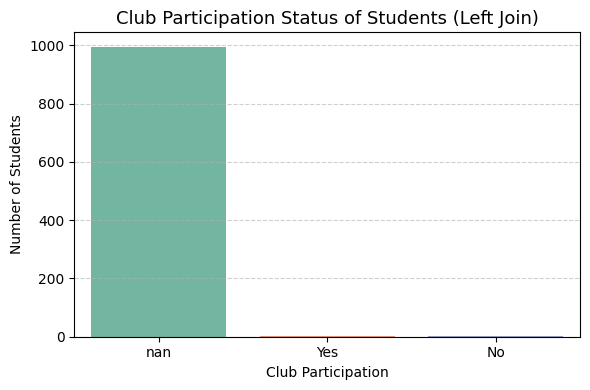

In [34]:
plt.figure(figsize=(6, 4))
sns.barplot(data=plot_df, x='club_participation', y='count', hue='club_participation', palette='Set2', legend=False)
plt.title('Club Participation Status of Students (Left Join)', fontsize=13)
plt.xlabel('Club Participation')
plt.ylabel('Number of Students')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

---

### Output Example Summary
You will get:

##### => Cleaned data: no missing or duplicate values

##### => Standardized columns and formatting

##### => Joined club_participation and school_info using student_id and school_id

##### => Demonstrated Left, Right, Outer joins clearly

##### => Visualized club participation distribution using bar chart

---